In [2]:
include("sepsis_types.jl")
using .SepsisTypes
include("sepsis.jl")
using .Sepsis
include("inference.jl")
using .Inference
using Revise
using PyCall;
using Gen;
using CairoMakie
sepsis_gym = pyimport("custom_sepsis");

In [2]:
policy = sepsis_gym.random_policy()
episode = sepsis_gym.run_episode(policy)

PyObject <custom_sepsis.sepsis_env.sepsis_types.Episode object at 0x14c7ffc10>

In [3]:
to_state(episode.visited[1])

State(LOW, LOW, LOW, LOW, true, false, false, false)

In [4]:
println("Checking if the actions in the episode are consistent with the state transitions")
for (i, state) in enumerate(episode.visited[1:end-1])
    action = to_action(policy[state])
    next_state = to_state(episode.visited[i+1])
    println(action.abx == next_state.abx && action.vaso == next_state.vaso && action.vent == next_state.vent)
end

Checking if the actions in the episode are consistent with the state transitions
true


In [5]:
env_params = get_beliefs()
param_vector = get_env_params(env_params)


18-element Vector{Float64}:
 0.7146698673637146
 0.1768473948450039
 0.6539599752145859
 0.5993845651016922
 0.04927524353701251
 0.02332705015030542
 0.013865073331523182
 0.8629689739136955
 0.8861660466316643
 0.913097688076458
 0.3012879211157481
 0.2049978052742301
 0.5769012814113779
 0.7250514481340049
 0.4427614779712121
 0.5177151281729974
 0.30856308194615023
 0.3749280324439109

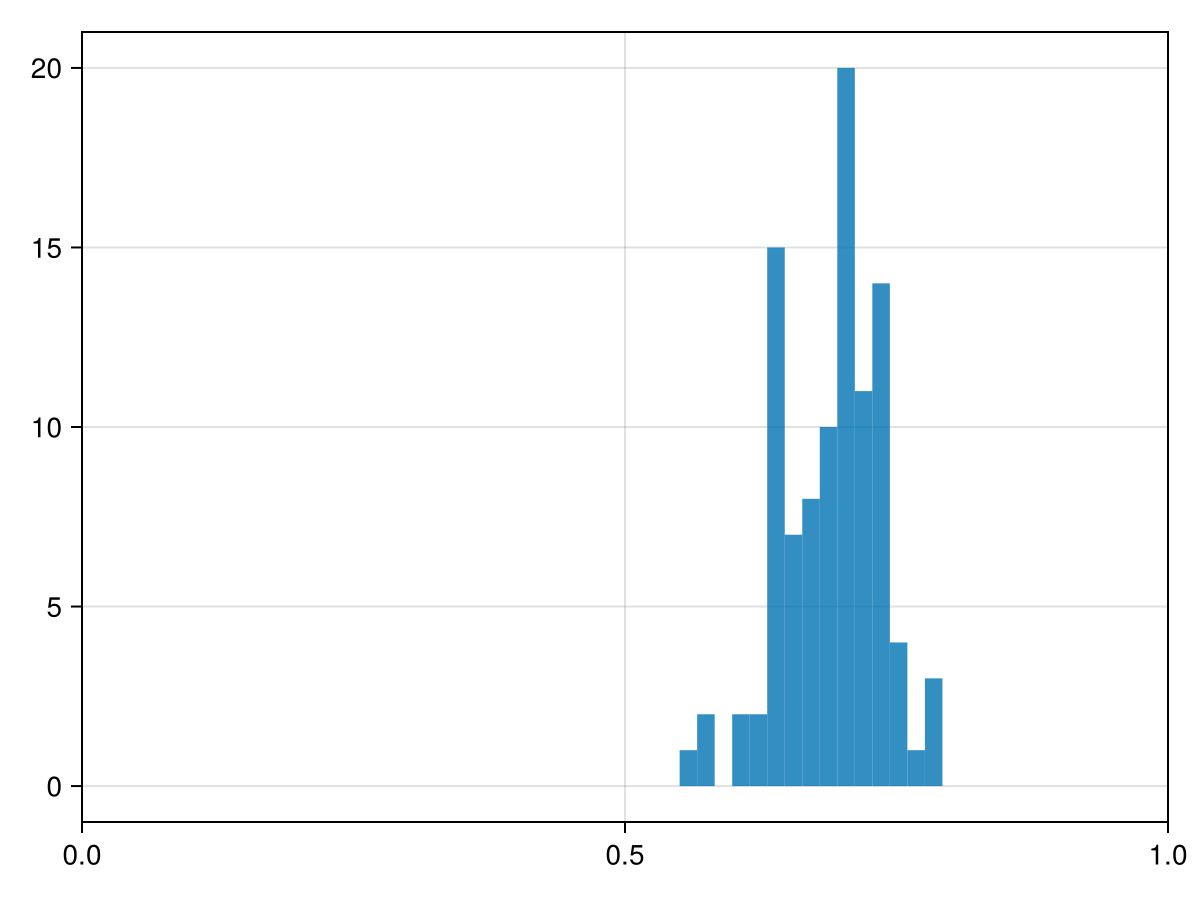

In [22]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1], limits=(0, 1, nothing, nothing))
hist!(ax, [beta(70,30) for i in 1:100])
fig

In [10]:
policy = sepsis_gym.random_policy()
sepsis_gym.run_episode(policy).rewards

env = sepsis_gym.SepsisEnv(param_vector)

training = sepsis_gym.train_dqn(env, 10000, "test_call_from_julia")
training.evaluate_policy(10000)

UndefVarError: UndefVarError: `param_vector` not defined

In [7]:
random_policies = [sepsis_gym.random_policy() for i in 1:100];

In [8]:
sepsis_gym.run_episode(random_policies[1]).visited


2-element Vector{Tuple{Int64, Int64, Int64, Int64, Vararg{Bool, 4}}}:
 (-1, -1, 0, 1, 0, 0, 0, 0)
 (-1, -1, 0, 1, 0, 0, 0, 0)

In [16]:
# param_vector = get_env_params(traces[end][:beliefs])

# env = sepsis_gym.SepsisEnv(param_vector)

# training = sepsis_gym.train_dqn(env, 100000, "thompson_sampling_try1")


In [17]:
# training.evaluate_policy(10000)